In [35]:
import os, shutil
import keypoint_moseq as kpms

In [36]:
MODE = "dannce"
PROJECT_DIR = "/mnt/d/Project/Keypoint-Moseq/20250913"
KEYPOINT_DATA = "/mnt/d/Project/Keypoint-Moseq/20250913"
BEST_MODEL = "my_models-1"

In [37]:
config = lambda: kpms.load_config(PROJECT_DIR)
coordinates, confidences, bodyparts = kpms.load_keypoints(KEYPOINT_DATA, MODE)

Loading keypoints: 100%|██████████████████| 6/6 [00:00<00:00,  8.83it/s]


In [38]:
def visualize_model_result(coordinates, project_dir=PROJECT_DIR, model_name=BEST_MODEL, mode=MODE):
    results = kpms.load_results(project_dir, model_name)

    kpms.plot_similarity_dendrogram(coordinates, results, project_dir, model_name, **config())
    kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name, **config())
    if mode == "dannce":
        kpms.generate_grid_movies(results, project_dir, model_name, coordinates=coordinates, 
            keypoints_only=True, keypoints_scale=1, use_dims=[0,1], **config())
    else:
        kpms.generate_grid_movies(results, project_dir, model_name, coordinates=coordinates, **config())

In [39]:
def backup_result(filepath):
    if not os.path.isfile(filepath):
        print(f"Error: Not a file: {filepath}.")
        return False
    
    filedir = os.path.dirname(filepath)
    backup_idx = 0
    backup_dir = os.path.join(filedir, "backup")
    os.makedirs(backup_dir, exist_ok=True)
    backup_filepath = os.path.join(backup_dir, f"results_backup{backup_idx}.h5")

    while os.path.isfile(backup_filepath):
        backup_idx += 1
        backup_filepath = os.path.join(backup_dir, f"results_backup{backup_idx}.h5")

    shutil.move(filepath, backup_filepath)
    return True

In [40]:
def get_syllable_lists_from_input():
    syllable_lists = []
    print("Enter lists of integer syllables to merge:")
    print("  - Separate syllables within a list using ',' (e.g., '1,2,3')")
    print("  - Separate different lists using ';' (e.g., '1,2,3;4,5;6')")
    print("  - Example: '1,2;3,4,5;6' → becomes [[1, 2], [3, 4, 5], [6]]")
    print("  - Leave it blank to accept the current syllables.\n")

    while True:
        user_input = input("Enter list(s) or press Enter to finish: ").strip()
        print(f"Received user input: {user_input}")

        if not user_input:
            break

        # Split input by semicolon to get individual lists
        list_strs = user_input.split(';')
        current_lists = []

        for i, s in enumerate(list_strs):
            s = s.strip()
            if not s:  # Skip empty parts (e.g., "1,2;;3" → middle is empty)
                continue

            # Split by comma and convert each part to int
            try:
                syllables = [int(x.strip()) for x in s.split(',')]
                current_lists.append(syllables)
            except ValueError:
                print(f"Invalid syllable '{s}' in list {i+1}. Skipping this list.")
                continue

        if current_lists:
            syllable_lists.extend(current_lists)
            print(f"Added: {current_lists}")
        else:
            print("No valid syllables found in input.")

    return syllable_lists

In [41]:
def merge_syllable(syllables_to_merge, project_dir=PROJECT_DIR, model_name=BEST_MODEL):
    results_path = os.path.join(project_dir, model_name, 'results.h5')
    results = kpms.load_hdf5(results_path)

    try:
        status = backup_result(results_path)
    except Exception as e:
        print(f"Error: Failed to backup the original results due to {e}.")
        print("Syllable merge operation cancelled.")
        return
    if not status:
        print("Syllable merge operation cancelled.")
        return
    
    syllable_mapping = kpms.generate_syllable_mapping(results, syllables_to_merge)
    new_results = kpms.apply_syllable_mapping(results, syllable_mapping)

    new_results_path = os.path.join(project_dir, model_name, 'results.h5')
    kpms.save_hdf5(new_results_path, new_results)

Saving dendrogram plot to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/similarity_dendrogram
Saving trajectory plots to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/trajectory_plots


Generating trajectory plots: 100%|██████| 18/18 [00:10<00:00,  1.78it/s]


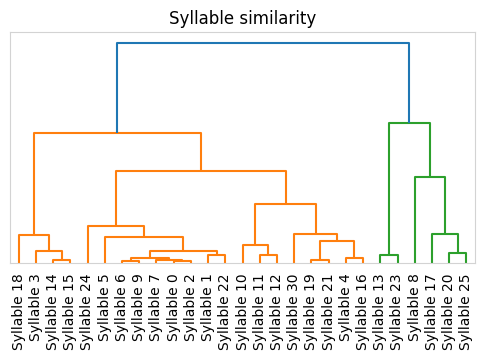

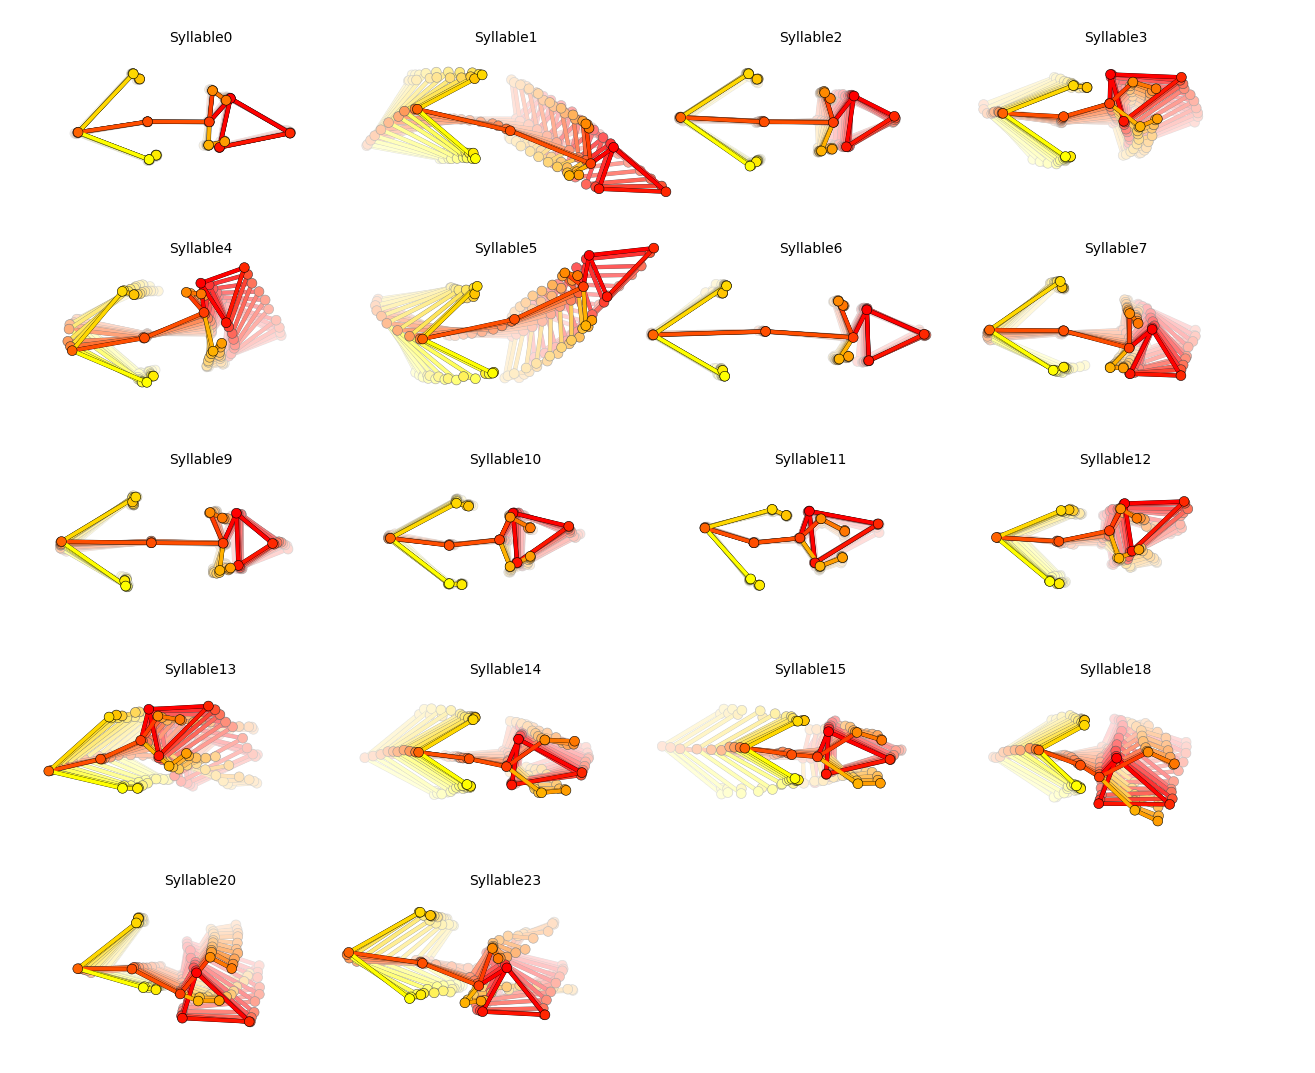

Generating trajectory plots: 100%|██████| 18/18 [00:08<00:00,  2.20it/s]


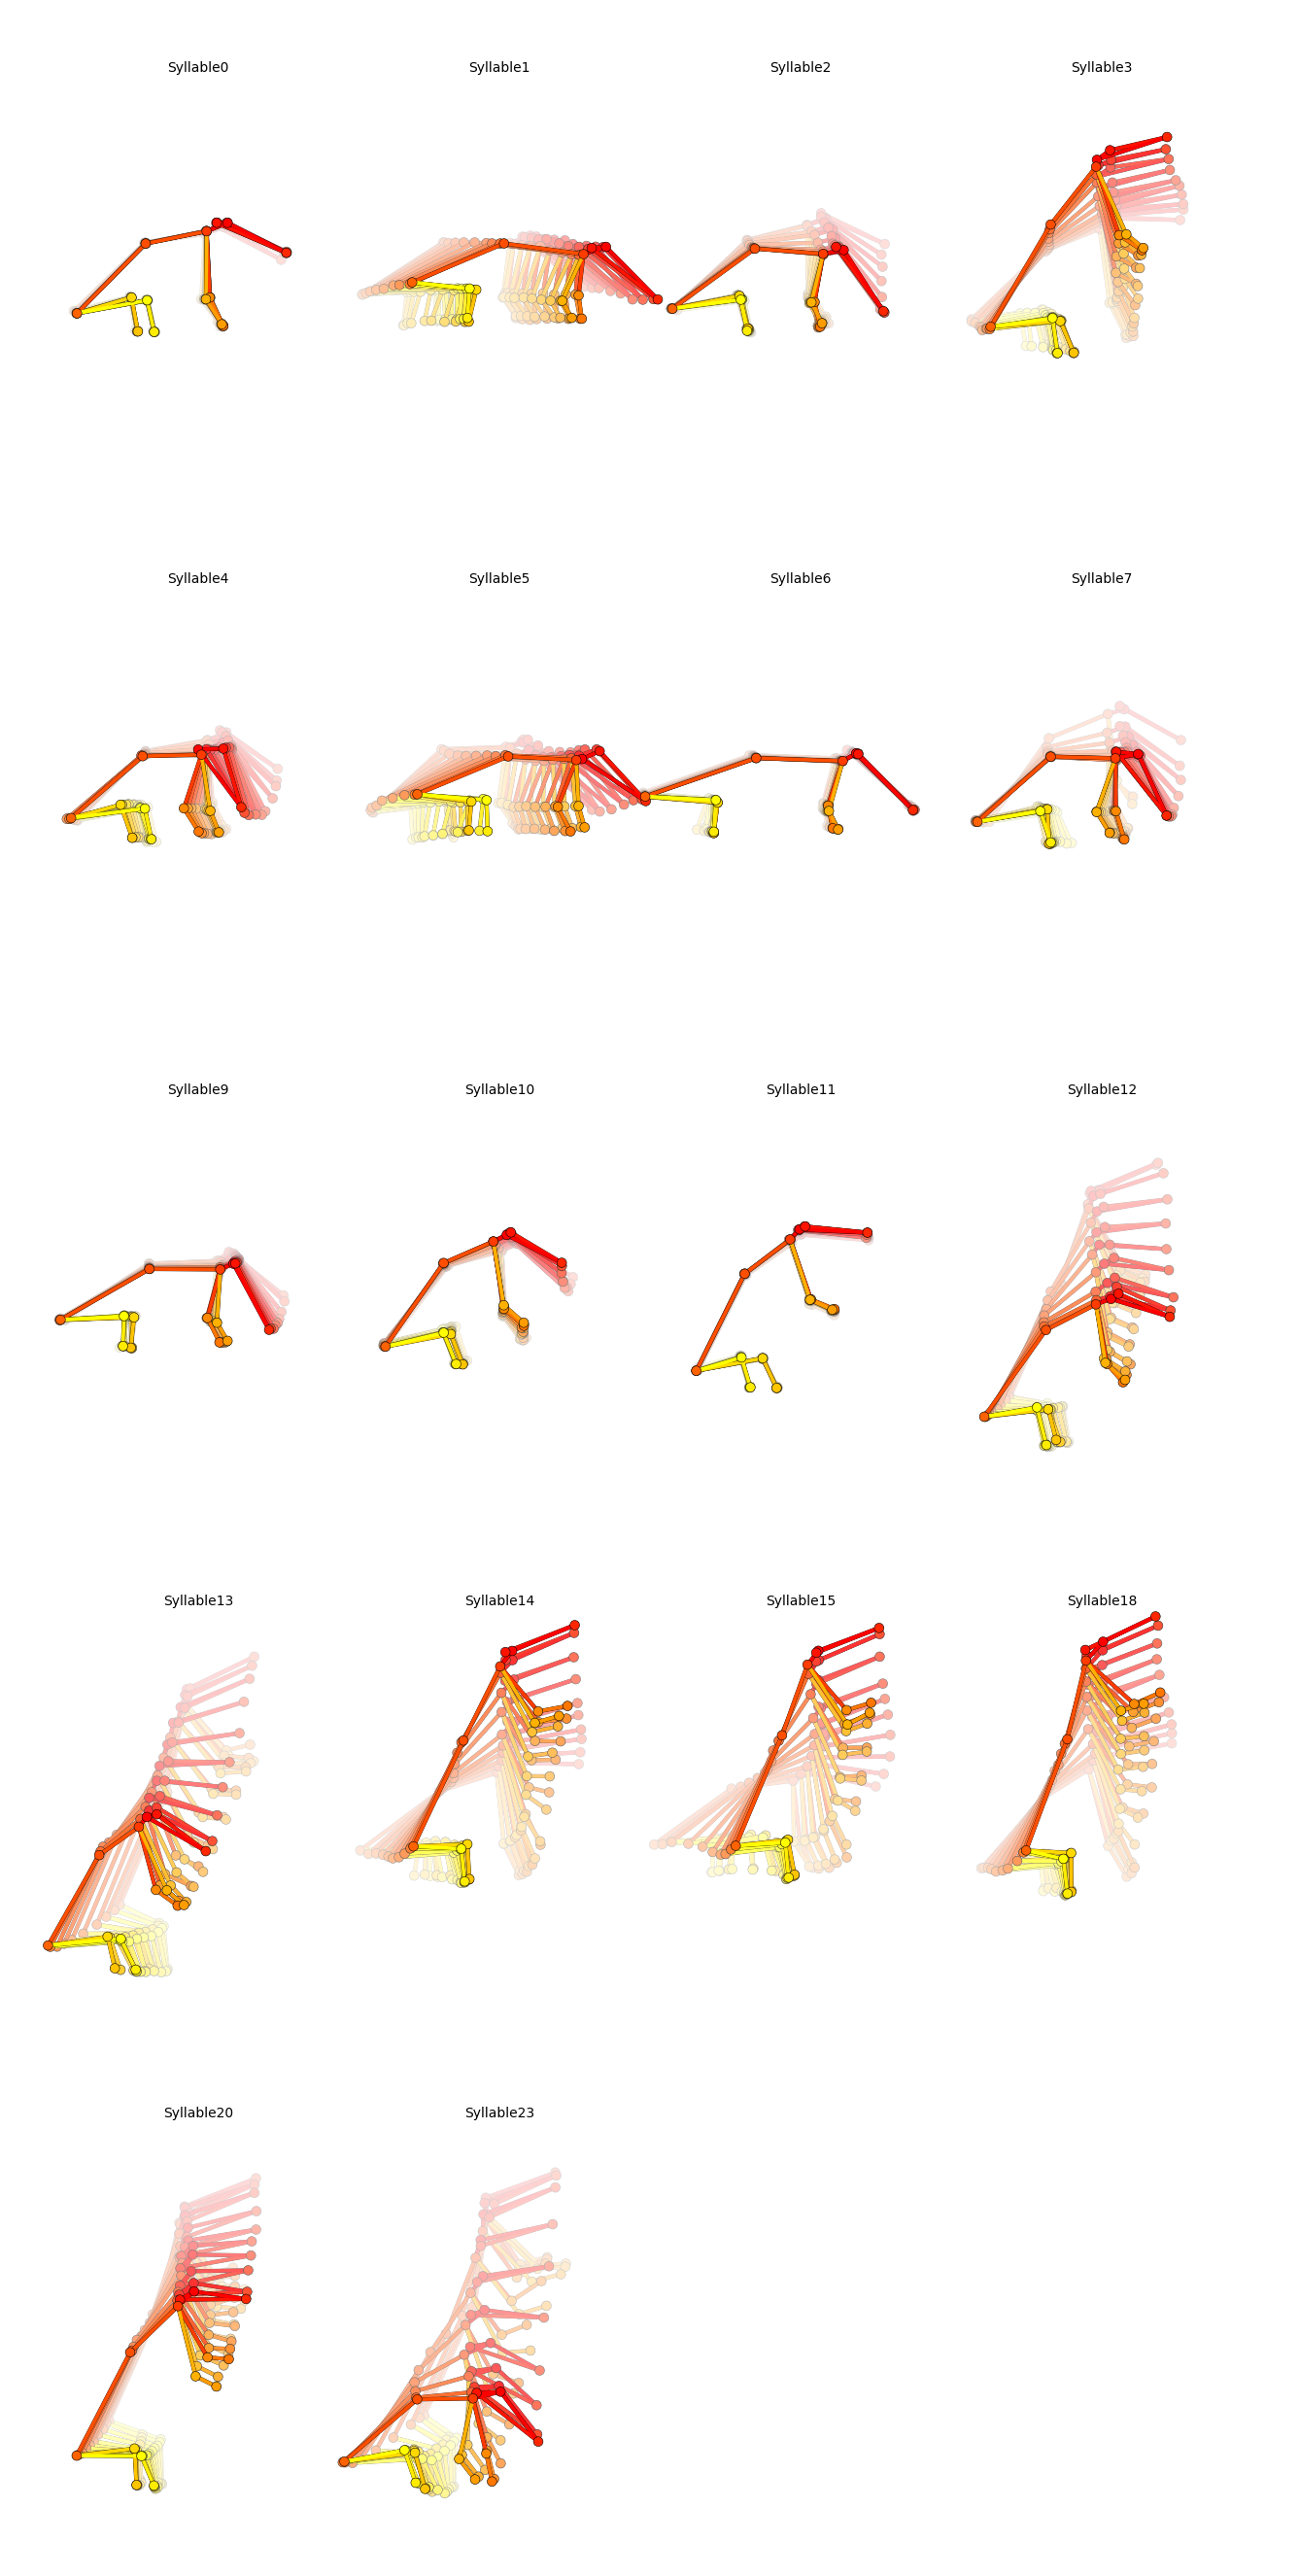

Saved interactive trajectories plot to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/trajectory_plots/all_trajectories.html


Writing grid movies to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/grid_movies
Using window size of 128 pixels


Generating grid movies:   0%|                    | 0/23 [00:00<?, ?it/s]/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/subprocess.py:1796: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

Generating grid movies: 100%|███████████| 23/23 [00:45<00:00,  1.97s/it]


Enter lists of integer syllables to merge:
  - Separate syllables within a list using ',' (e.g., '1,2,3')
  - Separate different lists using ';' (e.g., '1,2,3;4,5;6')
  - Example: '1,2;3,4,5;6' → becomes [[1, 2], [3, 4, 5], [6]]
  - Leave it blank to accept the current syllables.

Received user input: 14,15
Added: [[14, 15]]
Received user input: 18,3
Added: [[18, 3]]
Received user input: 0,2,6,9,7
Added: [[0, 2, 6, 9, 7]]
Received user input: 11,12
Added: [[11, 12]]
Received user input: 19,21
Added: [[19, 21]]
Received user input: 4,16
Added: [[4, 16]]
Received user input: 13,23
Added: [[13, 23]]
Received user input: 20,25
Added: [[20, 25]]
Received user input: 
Saving dendrogram plot to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/similarity_dendrogram
Saving trajectory plots to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/trajectory_plots


Generating trajectory plots: 100%|██████| 11/11 [00:04<00:00,  2.62it/s]


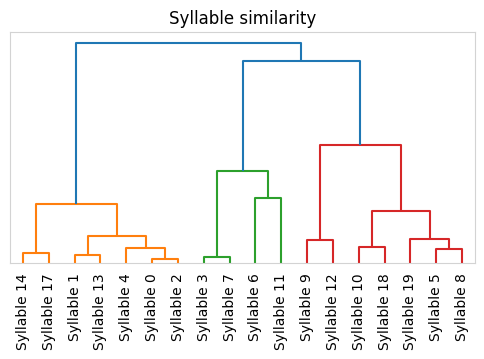

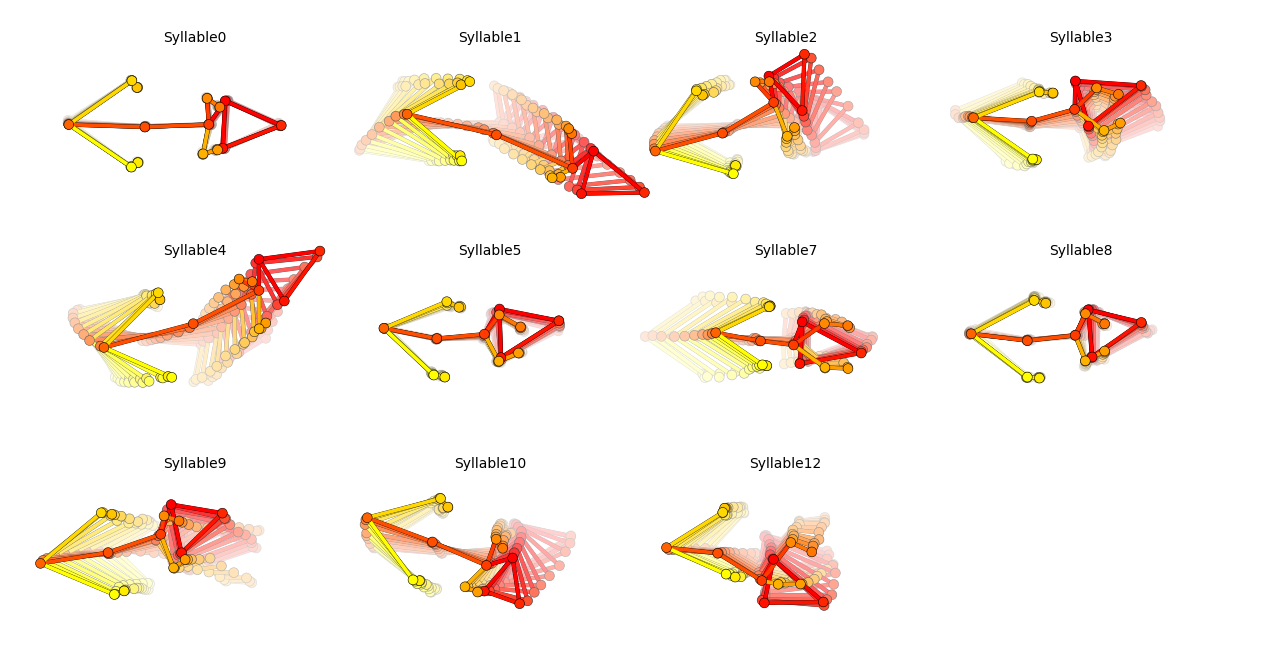

Generating trajectory plots: 100%|██████| 11/11 [00:04<00:00,  2.27it/s]


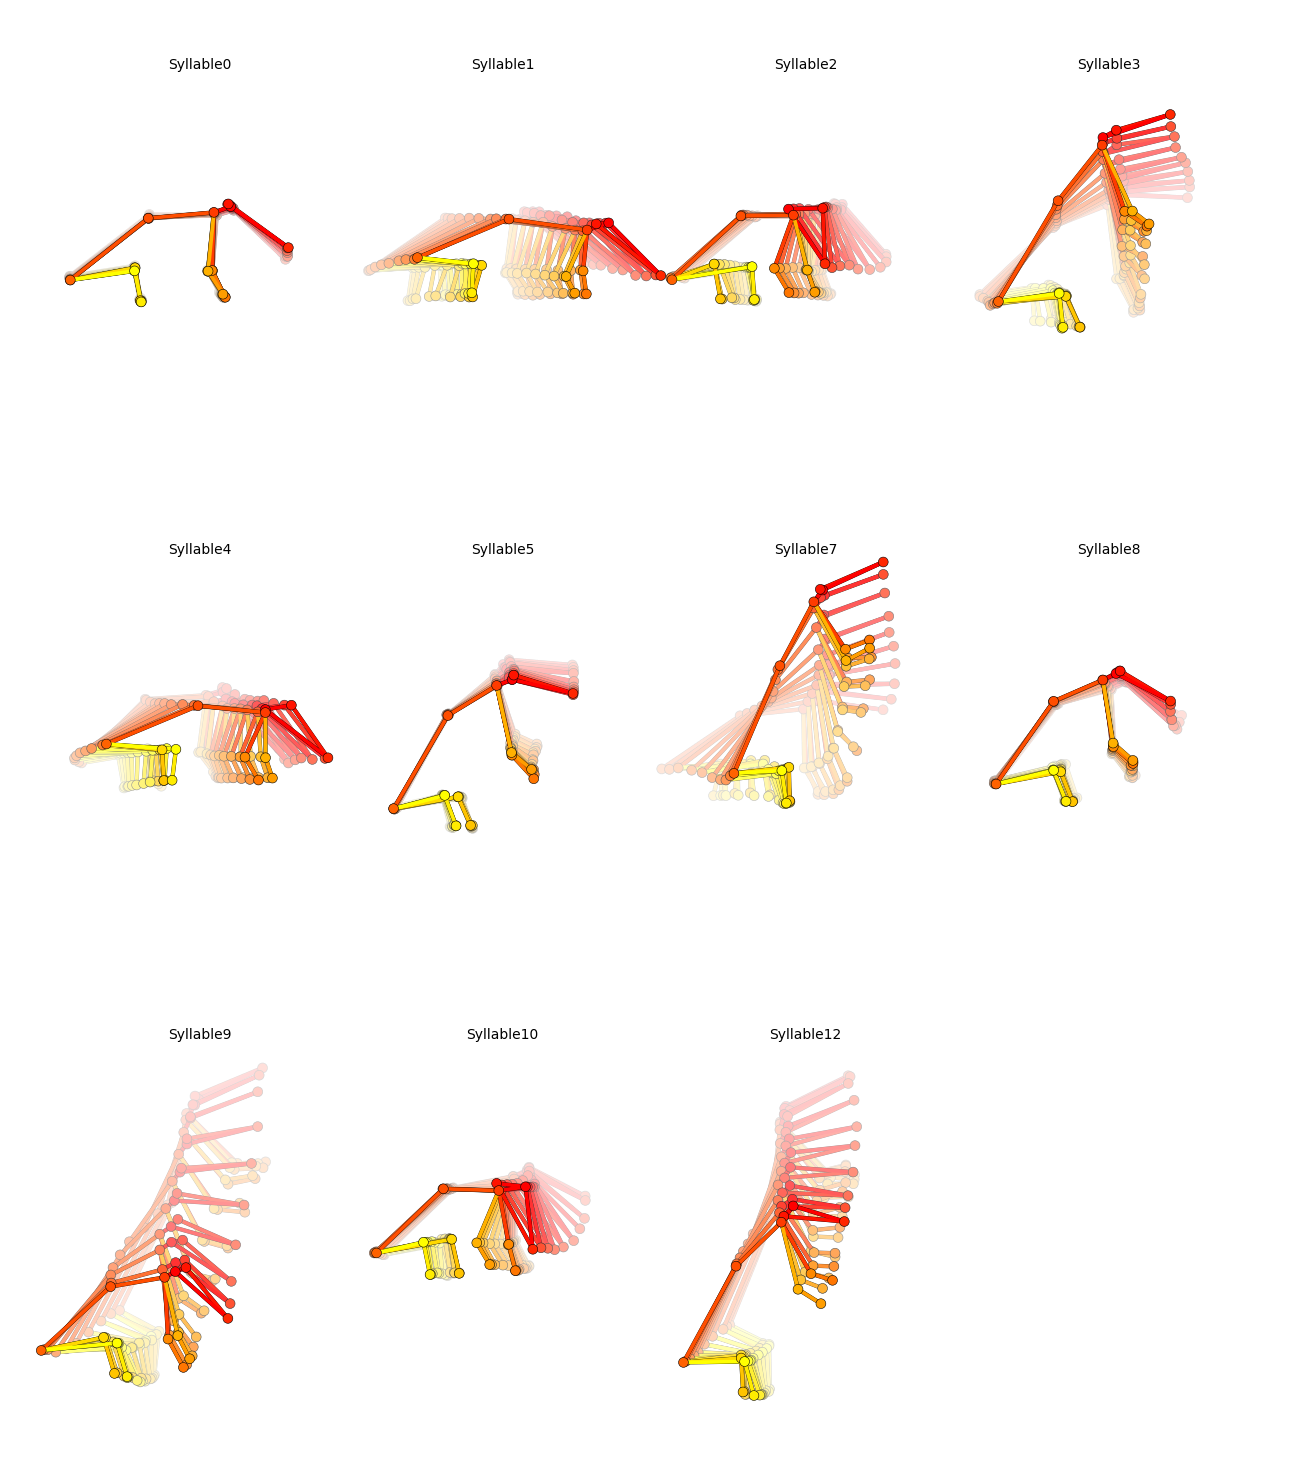

Saved interactive trajectories plot to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/trajectory_plots/all_trajectories.html


Writing grid movies to /mnt/d/Project/Keypoint-Moseq/20250913/my_models-1/grid_movies
Using window size of 144 pixels


Generating grid movies:   0%|                    | 0/13 [00:00<?, ?it/s]/home/bezver/anaconda3/envs/keypoint_moseq/lib/python3.10/subprocess.py:1796: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

Generating grid movies: 100%|███████████| 13/13 [00:37<00:00,  2.88s/it]


Enter lists of integer syllables to merge:
  - Separate syllables within a list using ',' (e.g., '1,2,3')
  - Separate different lists using ';' (e.g., '1,2,3;4,5;6')
  - Example: '1,2;3,4,5;6' → becomes [[1, 2], [3, 4, 5], [6]]
  - Leave it blank to accept the current syllables.

Received user input: 


In [42]:
accepted = False
while not accepted:
    results = kpms.load_results(PROJECT_DIR, BEST_MODEL)
    visualize_model_result(coordinates)
    syllables_to_merge = get_syllable_lists_from_input()

    if not syllables_to_merge:
        accepted = True
    else:
        merge_syllable(syllables_to_merge)